In [3]:
from pynq import Overlay
from pynq.lib.pmod import Pmod_ADC
import time

# Load the bitstream (Make sure the bitstream contains the required SPI IP)
overlay = Overlay("ad1.bit")


In [4]:
print(overlay.ip_dict.keys())


dict_keys(['PmodAD1_0'])


In [5]:
adc_ip = overlay.PmodAD1_0



In [6]:
adc_ip = overlay.PmodAD1_0

# Function to read data from the ADC channels
def read_adc(channel):
    # Example register addresses (adjust these according to your design)
    register_address = 0x00 + (channel * 0x02)  # Ensure channel data is aligned to 4-byte boundary
    data = adc_ip.mmio.read(0)  # Read channel-specific data
    return data

# Function to read data from both channels of PMOD AD1
def read_pmod_adc():
    for _ in range(100):  # Take 10 readings as an example
        # Read from channel 0 and channel 1
        value_channel_0 = read_adc(0)  # Read from Channel 0
        
        # Print the values from both channels
        print(value_channel_0//100000)
        
        # Sleep for 1 second between readings
        time.sleep(0.1)

# Call the function to start reading data from the ADC



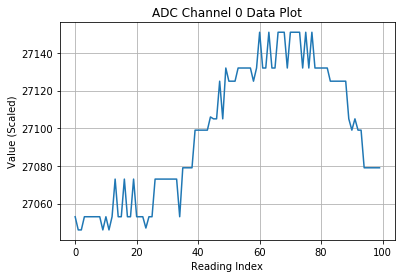

In [11]:
import time
import matplotlib.pyplot as plt

# Assuming adc_ip.mmio.read(0) returns a value for the given channel
def read_adc(channel):
    # Example register addresses (adjust these according to your design)
    register_address = 0x00 + (channel * 0x01)  # Ensure channel data is aligned to 4-byte boundary
    data = adc_ip.mmio.read(register_address)  # Read channel-specific data
    return data

# Function to read data from both channels of PMOD AD1 and plot it
def read_pmod_adc():
    values_channel_0 = []  # List to store Channel 0 readings

    for _ in range(100):  # Take 100 readings
        # Read from channel 0
        value_channel_0 = read_adc(0)  # Read from Channel 0
        value_channel_0_scaled = value_channel_0//10000   # Scale the value for readability

        # Append the value to the list
        values_channel_0.append(value_channel_0_scaled)

        # Print the value from Channel 0
#         print(value_channel_0_scaled)
        
        # Sleep for 0.1 seconds between readings
        time.sleep(0.1)

    # Plot the collected data
    plt.plot(values_channel_0)
    plt.title('ADC Channel 0 Data Plot')
    plt.xlabel('Reading Index')
    plt.ylabel('Value (Scaled)')
    plt.grid(True)
    plt.show()

# Call the function to start reading data and plot it
read_pmod_adc()
